In [1]:
import numpy as np
import pandas as pd

In [7]:
trans = pd.DataFrame(
    {'A':[12,4,5,None,1],
    'B':[7,2,54,3,None],
    'C':[20,16,11,3,8],
    'D':[14,3,None,2,6]},
    index =['Row_1','Row_2','Row_3','Row_4','Row_5']
)
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [8]:
result = trans.transform(lambda x : x+10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [9]:
result2 = trans.transform([np.sqrt, np.exp])
result2

A                        B  ...             C         D              
           sqrt            exp      sqrt  ...           exp      sqrt           exp
Row_1  3.464102  162754.791419  2.645751  ...  4.851652e+08  3.741657  1.202604e+06
Row_2  2.000000      54.598150  1.414214  ...  8.886111e+06  1.732051  2.008554e+01
Row_3  2.236068     148.413159  7.348469  ...  5.987414e+04       NaN           NaN
Row_4       NaN            NaN  1.732051  ...  2.008554e+01  1.414214  7.389056e+00
Row_5  1.000000       2.718282       NaN  ...  2.980958e+03  2.449490  4.034288e+02

[5 rows x 8 columns]

In [10]:
x= np.random.randint(10, 200, size=10)

In [11]:
x

array([146,  77, 153,  78,  81,  15, 134,  43,  74,  43])

In [12]:
np.digitize(x, bins=[50])

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [13]:
np.digitize(x, bins=[50,100])

array([2, 1, 2, 1, 1, 0, 2, 0, 1, 0])

In [17]:
df = pd.DataFrame({'height':x})
df

,height
0,146
1,77
2,153
3,78
4,81
5,15
6,134
7,43
8,74
9,43


In [18]:
df['binned'] = pd.cut(x=df['height'], bins=[0,25,50,100,200])
df

,height,binned
0,146,"(100, 200]"
1,77,"(50, 100]"
2,153,"(100, 200]"
3,78,"(50, 100]"
4,81,"(50, 100]"
5,15,"(0, 25]"
6,134,"(100, 200]"
7,43,"(25, 50]"
8,74,"(50, 100]"
9,43,"(25, 50]"


In [19]:
df['bin_label'] = pd.cut(x = df['height'],
              bins = [0,25,50,100,200],
              labels = [1,2,3,4]
              )

In [20]:
df

,height,binned,bin_label
0,146,"(100, 200]",4
1,77,"(50, 100]",3
2,153,"(100, 200]",4
3,78,"(50, 100]",3
4,81,"(50, 100]",3
5,15,"(0, 25]",1
6,134,"(100, 200]",4
7,43,"(25, 50]",2
8,74,"(50, 100]",3
9,43,"(25, 50]",2


In [21]:
pd.qcut(df['height'], q=5)

0    (136.4, 153.0]
1      (75.8, 79.2]
2    (136.4, 153.0]
3      (75.8, 79.2]
4     (79.2, 136.4]
5    (14.999, 43.0]
6     (79.2, 136.4]
7    (14.999, 43.0]
8      (43.0, 75.8]
9    (14.999, 43.0]
Name: height, dtype: category
Categories (5, interval[float64]): [(14.999, 43.0] < (43.0, 75.8] < (75.8, 79.2] < (79.2, 136.4] <
                                    (136.4, 153.0]]

In [23]:
degrees = ['none', 'cum laude', 'magna cum laude', 'summa cum laude']
student_results = [3.93,3.24,2.80,2.83,3.91,3.698,3.731,3.25,3.24,3.82,3.22]
student_results.sort(reverse=True)

In [25]:
student_results_degrees = pd.cut(student_results, [0,3.6,3.8,3.9,4.0], labels=degrees)
honor= pd.DataFrame(
    {
      'gardes': student_results,
      'honors':student_results_degrees
    }
)
honor

,gardes,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


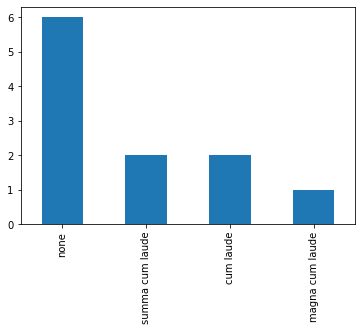

In [26]:
pd.value_counts(student_results_degrees).plot.bar()